In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread

def display(im):  # Define a new Python routine
    """
    Displays an image using the methods of the 'matplotlib' library.
    """
    plt.figure(figsize=(8,8))                     # Square blackboard
    plt.imshow( im, cmap="gray", vmin=0, vmax=1)  # Display 'im' using a gray colormap,
                                                  #         from 0 (black) to 1 (white)

def extract_points(mask) :
    """
    Turns a binary mask (bitmap) into a list of point coordinates (an (N,2) array).
    """
    return np.vstack(mask.nonzero()).astype(float).T[:,::-1]  # Dark magic with NumPy...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/dicom/'

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.3 MB/s eta 0:00:00


In [ ]:
import os
import pydicom as dicom
Images = []
plt.figure(figsize=(15,20))
for filename in os.listdir(path):
    if filename.endswith("dcm"):
        Images.append(filename)



<Figure size 1500x2000 with 0 Axes>

In [ ]:
def get_pixels_hu(scans):
    scans.file_meta.TransferSyntaxUID = dicom.uid.ImplicitVRLittleEndian
    image = np.stack([scans.pixel_array])#np.stack([s.pixel_array for s in scans])
    # Convert to int16 (from sometimes int16),
    # возможно, так как значения всегда должны быть достаточно низкими (<32k)
    image = image.astype(np.int16)

    # Установит значение пикселов вне области сканирования равным 1
    # intercept обычно составляет -1024, так что воздух составляет примерно 0
    image[image == -2048] = 0

    # Convert to Hounsfield units (HU)
    intercept = scans.RescaleIntercept
    slope = scans.RescaleSlope

    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)

    image += np.int16(intercept)

    return np.array(image, dtype=np.int16)

________________________________________________________

In [ ]:
images = []
lesions = []
from skimage.io import imread
import os
root_path = '/content/drive/MyDrive/dicom'
x_path='jpgImage'
y_path='jpgMask'


for root, dirs, files in os.walk(root_path):
    print('files', files)
    if root.endswith(x_path):
      for im_file in files:
        images.append(imread(os.path.join(root, im_file)))
        lesions.append(imread(os.path.join(os.path.join(root_path, y_path), im_file)))



files []
files ['1.2.392.200036.9116.2.5.1.16.1613468577.1530166609.449693.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166585.947173.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166575.784017.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166551.477521.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166534.142970.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166599.292166.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166619.614059.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166605.668621.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166615.831901.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166579.566004.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166565.221726.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166602.278624.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166507.646457.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166554.868539.dcm', '1.2.392.200036.9116.2.5.1.16.1613468577.1530166559.649430.dcm', '1.2.392.

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
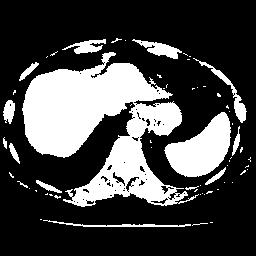

In [ ]:
images[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
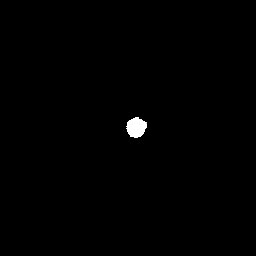

In [ ]:
lesions[0]

In [ ]:
type(images[1])

numpy.ndarray

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage.transform import resize
from skimage.io import imread
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pydicom as dicom


In [ ]:
from skimage.transform import resize
size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True,) for x in images]

Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]

In [ ]:
import numpy as np
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(Y)} images')

Loaded 440 images


#Бинаризация НУЖНА

In [ ]:
import cv2

new_X=[]
for x in X:
  ret, bw_img = cv2.threshold(x, 0.1, 1, cv2.THRESH_BINARY)
  new_X.append(bw_img)
X=np.array(new_X, np.float32)

new_Y=[]
for y in Y:
   new_Y.append(cv2.cvtColor(y, cv2.COLOR_RGB2GRAY))
Y=np.array(new_Y, np.float32)

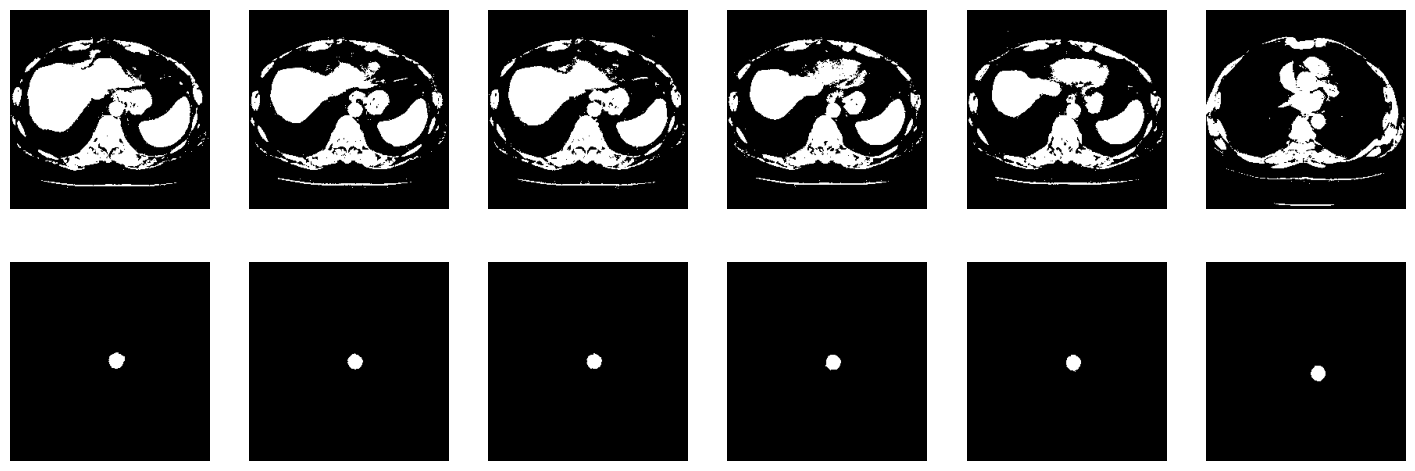

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
bias = 0
plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[bias + i], cmap='gray')

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[bias + i], cmap='gray')
plt.show();

In [ ]:
Y.shape

(440, 256, 256)

In [ ]:
X.shape

(440, 256, 256, 3)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

from matplotlib import rcParams

In [ ]:
ix = np.random.choice(len(X), len(X), False)
tr, val, ts = np.split(ix, [420, 430])

In [ ]:
print(len(tr), len(val), len(ts))

420 10 10


202

In [ ]:
ts

array([202, 240, 252, 219, 319, 299,  93, 220, 168,  96])

In [ ]:
from torch.utils.data import DataLoader
batch_size =8
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])),
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True)
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1), Y[ts, np.newaxis])),
                     batch_size=len(ts), shuffle=True)

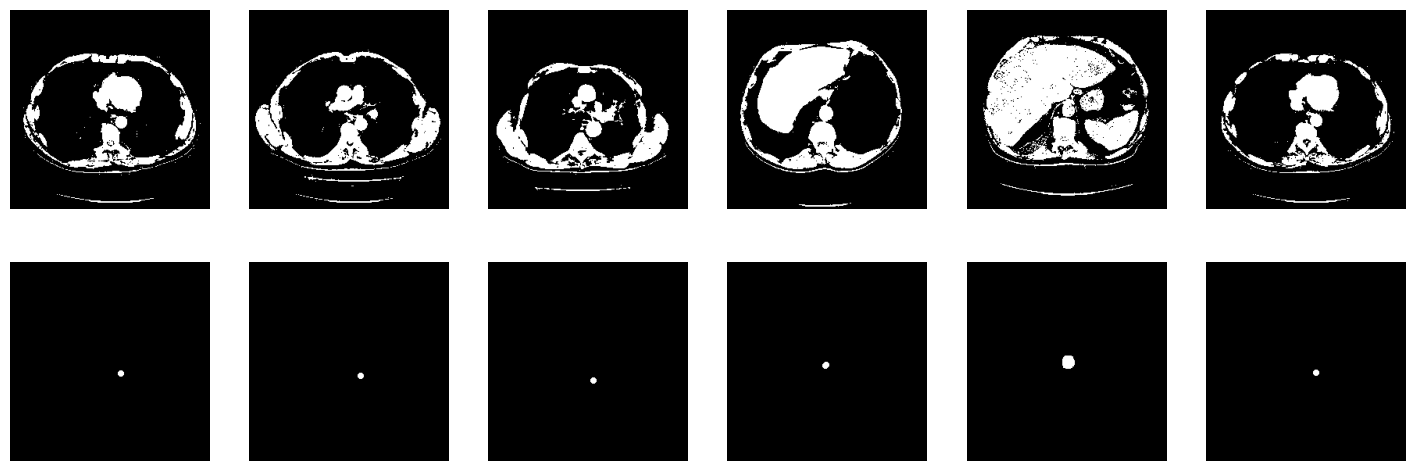

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
bias = 0
plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[ts[bias + i]], cmap='gray')

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[ts[bias + i]], cmap='gray')
plt.show();

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
def train(model, opt, loss_fn, epochs, data_tr, data_val):
    X_val, Y_val = next(iter(data_val))
    train_loss, val_loss, val_acc, train_f1_score, val_f1_score = [], [], [], [], []
    cm=0
    TP=0
    FP=0
    TN=0
    FN=0
    black=0
    white=0
    for epoch in range(epochs):
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))

        avg_loss = 0
        model.train()  # train mode
        for X_batch, Y_batch in data_tr:
            # data to device
            X_batch = X_batch.to(device)
            Y_batch = Y_batch.to(device)
            # set parameter gradients to zero
            opt.zero_grad()
            # forward
            Y_pred = model(X_batch)
            loss = loss_fn(Y_batch, Y_pred)  # forward-pass
            loss.backward()  # backward-pass
            #print(Y_batch)
            #print(Y_pred)

            #cm=cm_fn(Y_batch, Y_pred)
            #TP, FP, TN, FN, black, white=cm

            opt.step()  # update weights

            # calculate loss to show the user
            avg_loss += loss / len(data_tr)
        toc = time()
        print('loss: %f' % avg_loss)

        #train_f1_score.append(2*TP/(2*TP+FP+FN))


        train_loss.append(avg_loss)
        criterion = torch.nn.CrossEntropyLoss()

        # show intermediate results
        model.eval()  # testing mode
        Y_hat = model(X_val.to(device)).detach().cpu() # detach and put into cpu

        with torch.no_grad():
          test_loss = 0.0
          test_correct = 0
          test_total = 0
          test_preds = []
          test_labels = []

        sum_val_loss, sum_val_acc = 0, 0
        for X_val_batch, Y_val_batch in data_val:
            X_val_batch, Y_val_batch = X_val_batch.to(device), Y_val_batch.to(device)

            with torch.set_grad_enabled(False):
                vall_loss = loss_fn(Y_val_batch, model(X_val_batch))
            sum_val_loss += vall_loss

            Y_val_pred = torch.sigmoid(model(X_val_batch)) > 0.5

            #cm=cm_fn(Y_val_batch, Y_val_pred)
            #TP, FP, TN, FN, black, white=cm

            #val_f1_score.append(2*TP/(2*TP+FP+FN))
            sum_val_acc += iou_pytorch(Y_val_pred, Y_val_batch).mean().item()

        val_loss.append(sum_val_loss / len(data_val))
        val_acc.append(sum_val_acc / len(data_val))

        # Visualize tools
        clear_output(wait=True)
        # for k in range(6):
        #     plt.subplot(2, 6, k+1)
        #     plt.imshow(np.rollaxis(X_val[k].numpy(), 0, 3), cmap='gray')
        #     plt.title('Real')
        #     plt.axis('off')

        #     plt.subplot(2, 6, k+7)
        #     plt.imshow(Y_hat[k, 0], cmap='gray')
        #     plt.title('Output')
        #     plt.axis('off')
        # plt.suptitle('%d / %d - loss: %f' % (epoch+1, epochs, avg_loss))
        # plt.show()
    return train_loss, val_loss, val_acc

In [ ]:
"""TP=0
          TN=0
          FP=0
          FN=0
          for images, labels in data_val:
            images, labels= images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            _, labels2=torch.max(labels, 1)

            for num in range(0, len(labels)):
              for i in range(0, len(predicted[0])):
                for j in range(0, len(predicted[0])):
                  if (labels[num][0][i][j]==1 and predicted[num][i][j]==1):
                    TP += (predicted == labels).sum().item()
                  if (labels[num][0][i][j]==0 and predicted[num][i][j]==0):
                    TN+=1

                  if (labels[num][0][i][j]==0  and predicted[num][i][j]==1):
                    FP+=1
                  if (labels[num][0][i][j]==1  and predicted[num][i][j]==0):
                    FN+=1
            #TP+=(predicted == labels and predicted==1).sum().item()
            #TN+=(predicted == labels and predicted==0).sum().item()
            #FP+=(labels2==0 and predicted==1).sum().item()
            #FN+=(labels2==1 and predicted==0).sum().item()

            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            test_loss += criterion(outputs, labels).item()
            test_preds.extend(predicted.cpu().tolist())
            test_labels.extend(labels.cpu().tolist())

        test_accuracy = (test_correct / test_total) * 100
        #print(f"Test accuracy: {test_accuracy:.2f}%")
        print('TN=',TN,'|||TP=',TP,'|||FN=',FN,'|||FP=',FP)
        print('lOU=', TP/(TP+FN+FP))
        print('DICE=', 2*TP/(2*TP+FN+FP))
        # Generate the confusion matrix
        #conf_matrix = confusion_matrix(test_labels, test_preds)
        #plt.matshow(np.log(conf_matrix + 1))
        #plt.colorbar()
        #plt.show()
"""

'TP=0\n          TN=0\n          FP=0\n          FN=0\n          for images, labels in data_val:\n            images, labels= images.to(device), labels.to(device)\n            outputs = model(images)\n            _, predicted = torch.max(outputs.data, 1)\n            _, labels2=torch.max(labels, 1)\n\n            for num in range(0, len(labels)):\n              for i in range(0, len(predicted[0])):\n                for j in range(0, len(predicted[0])):\n                  if (labels[num][0][i][j]==1 and predicted[num][i][j]==1):\n                    TP += (predicted == labels).sum().item()\n                  if (labels[num][0][i][j]==0 and predicted[num][i][j]==0):\n                    TN+=1\n\n                  if (labels[num][0][i][j]==0  and predicted[num][i][j]==1):\n                    FP+=1\n                  if (labels[num][0][i][j]==1  and predicted[num][i][j]==0):\n                    FN+=1\n            #TP+=(predicted == labels and predicted==1).sum().item()\n            #TN+=

In [ ]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.enc_conv0 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=64,
                                                 kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=64),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=64, out_channels=64,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=64),
                                       nn.ReLU(inplace=True))

        # 256 -> 128
        self.pool0 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.enc_conv1 = nn.Sequential(nn.Conv2d(in_channels=64, out_channels=128,
                                                 kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=128),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=128, out_channels=128,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=128),
                                       nn.ReLU(inplace=True))

        # 128 -> 64
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.enc_conv2 = nn.Sequential(nn.Conv2d(in_channels=128, out_channels=256,
                                                 kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=256),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=256, out_channels=256,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=256),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=256, out_channels=256,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=256),
                                       nn.ReLU(inplace=True))

        # 64 -> 32
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.enc_conv3 = nn.Sequential(nn.Conv2d(in_channels=256, out_channels=512,
                                                 kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=512),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=512, out_channels=512,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=512),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=512, out_channels=512,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=512),
                                       nn.ReLU(inplace=True))

        # 32 -> 16
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # bottleneck
        self.bottleneck_conv = nn.Sequential(nn.Conv2d(in_channels=512, out_channels=256,
                                                       kernel_size=1, stride=1),
                                             nn.BatchNorm2d(256),
                                             nn.ReLU(inplace=True),

                                             nn.Conv2d(in_channels=256, out_channels=256,
                                                       kernel_size=3, padding=1, stride=1),
                                             nn.BatchNorm2d(256),
                                             nn.ReLU(inplace=True),

                                             nn.Conv2d(in_channels=256, out_channels=512,
                                                       kernel_size=1),
                                             nn.BatchNorm2d(512),
                                             nn.ReLU(inplace=True))

        # decoder (upsampling)

        # 16 -> 32
        self.upsample0 = nn.Upsample(scale_factor=2, mode='nearest')

        self.dec_conv0 = nn.Sequential(nn.Conv2d(in_channels=1024, out_channels=512,
                                                 kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=512),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=512, out_channels=512,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=512),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=512, out_channels=256,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=256),
                                       nn.ReLU(inplace=True))

        # 32 -> 64
        self.upsample1 = nn.Upsample(scale_factor=2, mode='nearest')

        self.dec_conv1 = nn.Sequential(nn.Conv2d(in_channels=512, out_channels=256,
                                                 kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=256),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=256, out_channels=256,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=256),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=256, out_channels=128,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=128),
                                       nn.ReLU(inplace=True))

        # 64 -> 128
        self.upsample2 = nn.Upsample(scale_factor=2, mode='nearest')

        self.dec_conv2 = nn.Sequential(nn.Conv2d(in_channels=256, out_channels=128,
                                                 kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=128),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=128, out_channels=64,
                                                kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=64),
                                       nn.ReLU(inplace=True))

        # 128 -> 256
        self.upsample3 = nn.Upsample(scale_factor=2, mode='nearest')

        self.dec_conv3 = nn.Sequential(nn.Conv2d(in_channels=128, out_channels=64,
                                                 kernel_size=3, padding=1, stride=1),
                                       nn.BatchNorm2d(num_features=64),
                                       nn.ReLU(inplace=True),

                                       nn.Conv2d(in_channels=64, out_channels=1,
                                                kernel_size=3, padding=1, stride=1))

    def forward(self, x):
        # encoder
        e0 = self.enc_conv0(x)
        p0 = self.pool0(e0)
        e1 = self.enc_conv1(p0)
        p1 = self.pool1(e1)
        e2 = self.enc_conv2(p1)
        p2 = self.pool2(e2)
        e3 = self.enc_conv3(p2)
        p3 = self.pool3(e3)

        # bottleneck
        b = self.bottleneck_conv(p3)

        # decoder
        d0 = self.dec_conv0(torch.cat((self.upsample0(b), e3), dim=1))
        d1 = self.dec_conv1(torch.cat((self.upsample1(d0), e2), dim=1))
        d2 = self.dec_conv2(torch.cat((self.upsample2(d1), e1), dim=1))
        d3 = self.dec_conv3(torch.cat((self.upsample3(d2), e0), dim=1))
        return d3

In [ ]:
unet_model = UNet().to(device)

In [ ]:

def tensorToImage(pred):
  img=[]
  for i in range(0, len(pred)):
    test=pred[i].detach().cpu().reshape(256,256).numpy()
    maxPX=test.max()-0.6
    ret, bw_img = cv2.threshold(test, maxPX, 1, cv2.THRESH_BINARY)
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (101,1))
    #morph1 = cv2.morphologyEx(bw_img, cv2.MORPH_CLOSE, kernel, iterations=2)
    #kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    #morph2=cv2.erode(morph1, kernel2, iterations=2)
    img.append(bw_img)
  return img

In [ ]:
def perf_measure(Y_label, Y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    black=0
    white=0
    print(Y_pred.size())
    #_, predicted = torch.max(Y_pred.data, 1)
    for num in range(0, len(Y_label)):
          for i in range(0, len(Y_pred[0])):
            for j in range(0, len(Y_pred[0])):
              if (Y_pred[num][i][j]==0):
                white+=1
              if (Y_pred[num][i][j]==1):
                black+=1
              if (Y_label[num][0][i][j]==Y_pred[num][i][j]==1):
                TP += 1
              if (Y_label[num][0][i][j]==Y_pred[num][i][j]==0):
                TN+=1
              if (Y_label[num][0][i][j]==0  and Y_pred[num][i][j]==1):
                FP+=1
              if (Y_label[num][0][i][j]==1  and Y_pred[num][i][j]==0):
                FN+=1
    return(TP, FP, TN, FN, black, white)

In [ ]:
def matrix(y_real, y_pred):
    cm=confusion_matrix(y_real, y_pred)
    return cm
def bce_loss(y_real, y_pred):
    # TODO
    # please don't use nn.BCELoss. write it from scratch

    return (y_pred - y_real*y_pred + torch.log(1+torch.exp(-y_pred))).mean()

In [ ]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):

    # be with the BATCH x 1 x H x W shape
    outputs = outputs.squeeze(1).byte()  # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0

    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0

    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds

    return thresholded  #

In [ ]:
max_epochs = 15
optim = torch.optim.Adam(unet_model.parameters())
unet_bce_train_loss, unet_bce_val_loss, unet_bce_val_acc = \
    train(unet_model, optim, bce_loss,  max_epochs, data_tr, data_val)

* Epoch 15/15
loss: 0.004567


In [ ]:
unet_bce_val_acc

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03125,
 0.0625,
 0.11249999701976776,
 0.03125,
 0.13750000298023224,
 0.21250000037252903,
 0.17500001192092896,
 0.39375001192092896,
 0.3687500059604645,
 0.20000000298023224]

In [ ]:
unet_bce_train_loss_ = []
for el in unet_bce_train_loss:
    unet_bce_train_loss_.append(el.item())

unet_bce_val_loss_ = []
for el in unet_bce_val_loss:
    unet_bce_val_loss_.append(el.item())

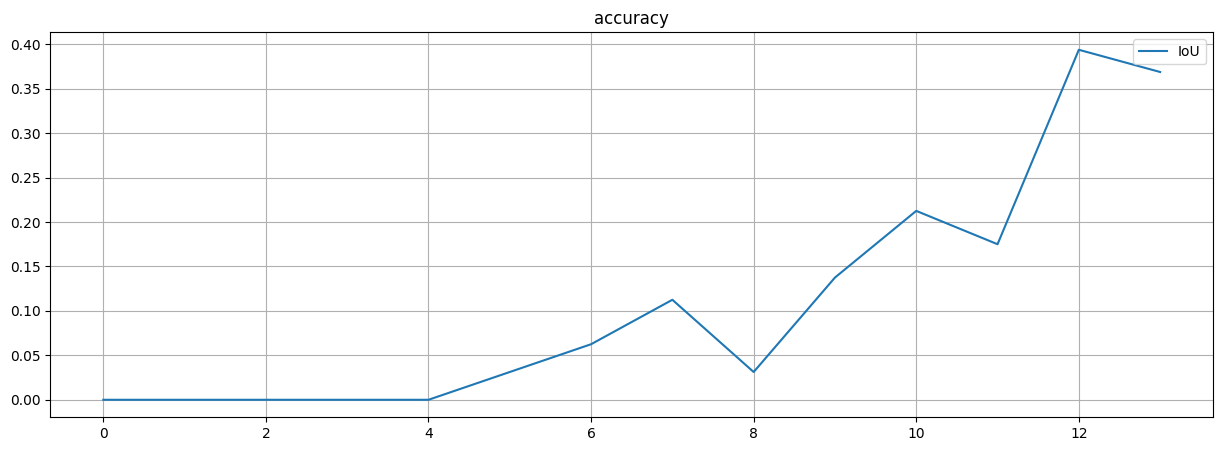

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(unet_bce_val_acc[0:14], label='IoU')

plt.title('accuracy')

plt.legend()
plt.grid()
plt.show()

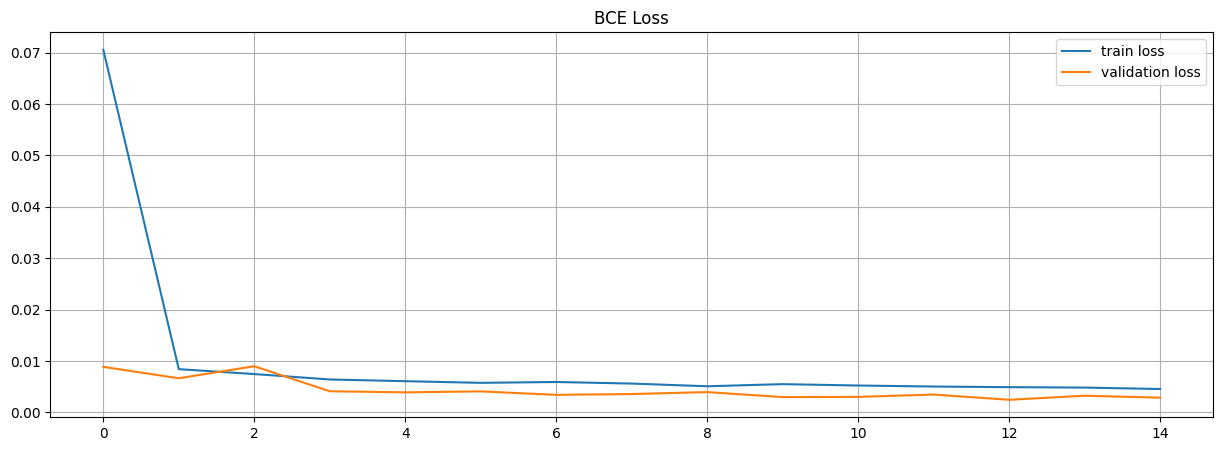

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(unet_bce_train_loss_, label='train loss')
plt.plot(unet_bce_val_loss_, label='validation loss')
plt.title('BCE Loss')

plt.legend()
plt.grid()
plt.show()

In [ ]:
X[0].shape

(256, 256, 3)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def predict_model(model, metric, data):
    Y_pred=0
    cm=0
    for X_batch, Y_label in data:
        Y_label=Y_label.to(device)
        Y_pred = model(X_batch.to(device))

        #cm=perf_measure(Y_label, Y_pred)
    #print(cm)
    #print('lOU=', TP/(TP+FN+FP))
    #print('DICE=', 2*TP/(2*TP+FN+FP))
    return Y_pred

In [ ]:

pred=predict_model(unet_model, iou_pytorch, data_ts)

In [ ]:
imageList=tensorToImage(pred)
imageList=np.array(imageList)

In [ ]:
len(data_ts)

1

In [ ]:
y_label=0
x_label=0
for X_batch, Y_label in data_ts:
  y_label=Y_label.to(device)
  x_label=X_batch.to(device)

cm=perf_measure(y_label, imageList)


In [ ]:
cm

(253, 328, 653823, 956, 581, 654779)

In [ ]:
TP, FP, TN, FN, black, white=cm

In [ ]:
IoU_TP=TP/(TP+FP+FN)
IoU_TN=TN/(TN+FP+FN)
IoU=(IoU_TP*white+IoU_TN*black)/(black+white)
Dice=2*TP/(2*TP+FP+FN)
print("IoU=",IoU, "\nDice=", Dice)

print("IoU_TP=",IoU_TP)

IoU= 0.16534524468538425 
Dice= 0.28268156424581004
IoU_TP= 0.1646063760572544


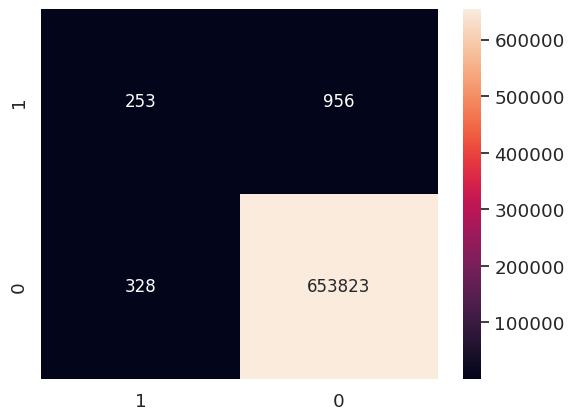

In [ ]:
import pandas as pd
import seaborn as sn

matrix=[[TP, FN],[FP, TN]]

df_cm = pd.DataFrame(matrix, index = [i for i in "10"],
                  columns = [i for i in "10"])
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='d') # font size

plt.show()


In [ ]:
os.mkdir('img')
os.mkdir('mask')
os.mkdir('pred')

In [ ]:


for i in range(len(ts)):
  path1='/content/drive/MyDrive/mask/'+str(i)+'.jpg'
  path2='/content/drive/MyDrive/img/'+str(i)+'.jpg'
  path3='/content/drive/MyDrive/pred/'+ str(i)+'.jpg'

  cv2.imwrite(path1, 255*y_label[i][0].detach().cpu().numpy())
  cv2.imwrite(path2, 255*x_label[i][0].detach().cpu().numpy())
  cv2.imwrite(path3, 255*imageList[i])

In [ ]:
!zip -r /content/pred.zip /content/pred
!zip -r /content/img.zip /content/img
!zip -r /content/mask.zip /content/mask

  adding: content/pred/ (stored 0%)
  adding: content/pred/7.jpg (deflated 63%)
  adding: content/pred/5.jpg (deflated 52%)
  adding: content/pred/1.jpg (deflated 47%)
  adding: content/pred/3.jpg (deflated 40%)
  adding: content/pred/6.jpg (deflated 51%)
  adding: content/pred/9.jpg (deflated 53%)
  adding: content/pred/2.jpg (deflated 51%)
  adding: content/pred/0.jpg (deflated 55%)
  adding: content/pred/4.jpg (deflated 50%)
  adding: content/pred/.ipynb_checkpoints/ (stored 0%)
  adding: content/pred/8.jpg (deflated 63%)
  adding: content/img/ (stored 0%)
  adding: content/img/7.jpg (deflated 4%)
  adding: content/img/5.jpg (deflated 4%)
  adding: content/img/1.jpg (deflated 4%)
  adding: content/img/3.jpg (deflated 5%)
  adding: content/img/6.jpg (deflated 5%)
  adding: content/img/9.jpg (deflated 4%)
  adding: content/img/2.jpg (deflated 4%)
  adding: content/img/0.jpg (deflated 5%)
  adding: content/img/4.jpg (deflated 5%)
  adding: content/img/.ipynb_checkpoints/ (stored 0%)
  

In [ ]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy=", accuracy)

accuracy= 0.9968734741210937


In [ ]:
y_label[0][0].shape

torch.Size([256, 256])

In [ ]:
ts

array([202, 240, 252, 219, 319, 299,  93, 220, 168,  96])

In [ ]:
c=5

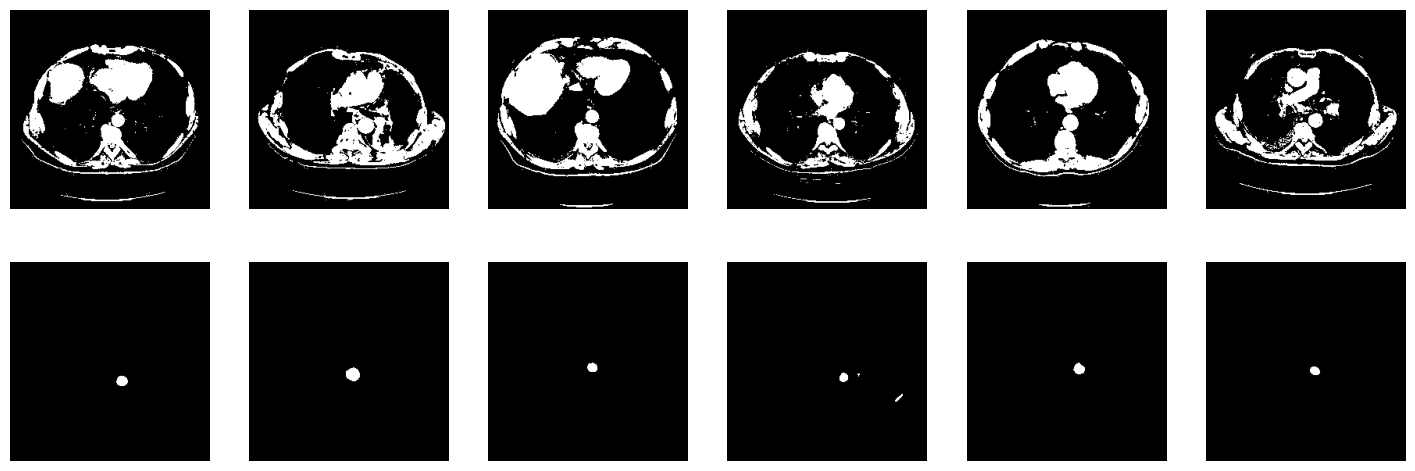

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
bias = 0
plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(x_label[bias + i][0].detach().cpu().numpy(), cmap='gray')

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(imageList[bias + i], cmap='gray')

plt.show();

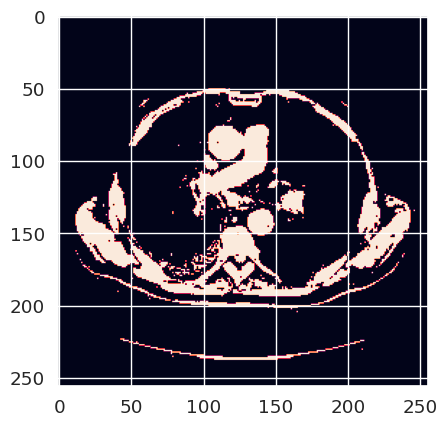

In [ ]:
plt.imshow(x_label[c][0].detach().cpu().numpy())

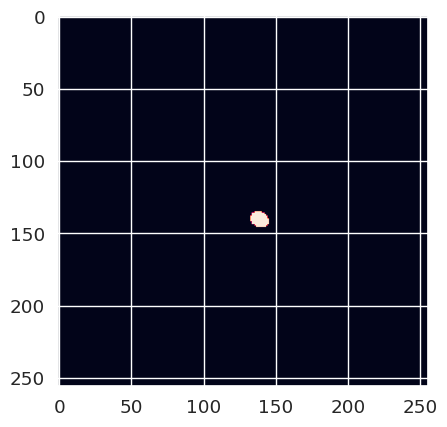

In [ ]:
plt.imshow(imageList[c])

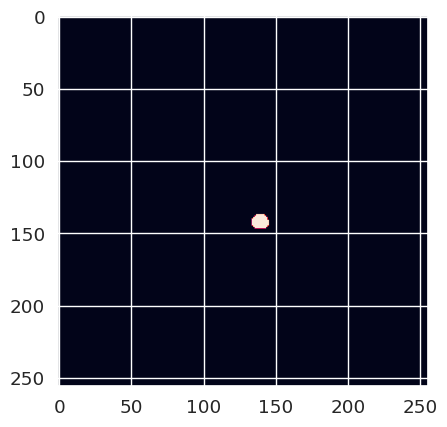

In [ ]:
plt.imshow(y_label[c][0].detach().cpu().numpy())

In [ ]:
cm

(0, 0, 522228, 2060)

In [ ]:
len(data_ts.dataset)

8

In [ ]:
torch.cuda.empty_cache()

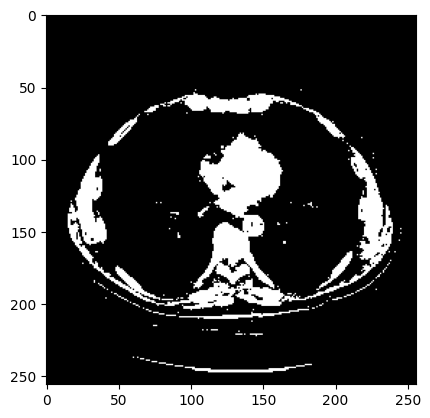

In [ ]:
plt.imshow(X[ts[1]])

<function matplotlib.pyplot.show(close=None, block=None)>

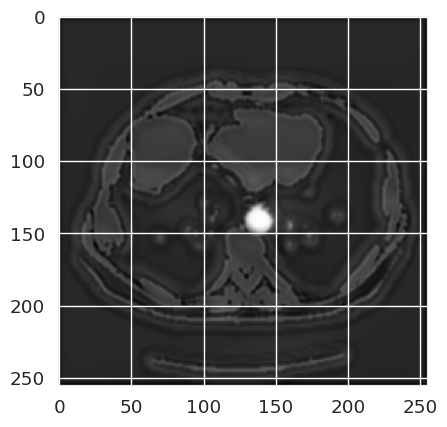

In [ ]:

plt.imshow(pred[c].detach().cpu().reshape(256,256), cmap='gray')
plt.show

In [ ]:
test=pred[1].detach().cpu().reshape(256,256).numpy()

<function matplotlib.pyplot.show(close=None, block=None)>

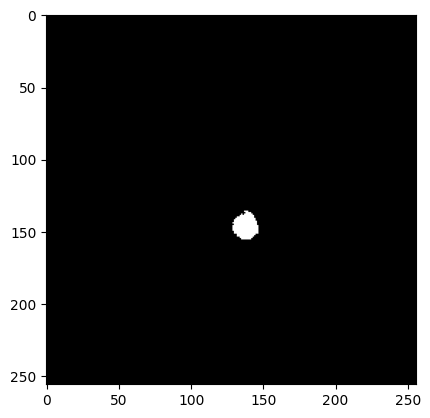

In [ ]:
ret, bw_img = cv2.threshold(test, -0.25, 1, cv2.THRESH_BINARY)
plt.imshow(bw_img, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

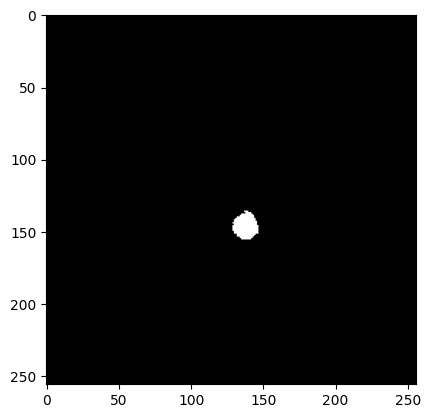

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (101,1))
morph1 = cv2.morphologyEx(bw_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph1, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

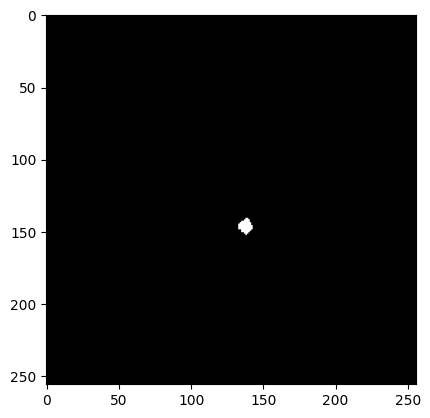

In [ ]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph2=cv2.erode(morph1, kernel2, iterations=3)
plt.imshow(morph2, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

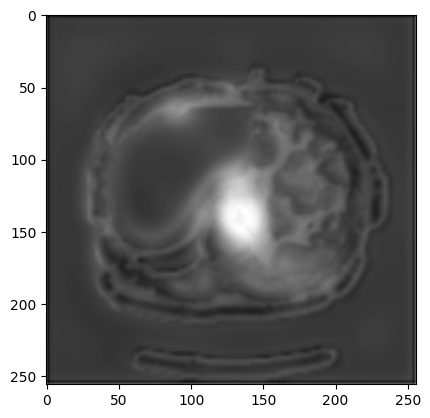

In [ ]:
plt.imshow(test, cmap='gray')
plt.show

In [ ]:
type(pred)

torch.Tensor

In [ ]:
from torchvision.utils import  save_image
save_image(pred[c], 'image.jpg')

In [ ]:

torch.save(unet_model.state_dict(), 'weigth')

Использование модели

In [ ]:
u=torch.load('weigth',map_location=torch.device('cpu'))

In [ ]:
u

OrderedDict([('enc_conv0.0.weight',
              tensor([[[[-0.1131, -0.0344, -0.0873],
                        [ 0.0503, -0.1499, -0.1389],
                        [ 0.0901, -0.0409, -0.1028]],
              
                       [[ 0.1434, -0.1500, -0.1466],
                        [-0.0747,  0.1336, -0.0392],
                        [ 0.1113, -0.0143,  0.0009]],
              
                       [[ 0.0241, -0.0394, -0.0115],
                        [-0.1977,  0.0499,  0.1409],
                        [-0.1494, -0.1297, -0.1506]]],
              
              
                      [[[ 0.1287,  0.0616,  0.1763],
                        [-0.1074, -0.0179, -0.1176],
                        [-0.0776, -0.0246,  0.0779]],
              
                       [[ 0.1731,  0.0215, -0.1092],
                        [ 0.0867,  0.0742,  0.1524],
                        [-0.0503, -0.0884, -0.0409]],
              
                       [[-0.0728,  0.1376, -0.0944],
                    

In [ ]:
model = UNet().to(device)
model.load_state_dict(u)
model.eval()

UNet(
  (enc_conv0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (enc_conv1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_

In [ ]:
pred_u=predict_model(model, iou_pytorch, data_ts)

(0, 0, 8, 0)


In [ ]:
imageList=tensorToImage(pred_u)
imageList=np.array(imageList)

<function matplotlib.pyplot.show(close=None, block=None)>

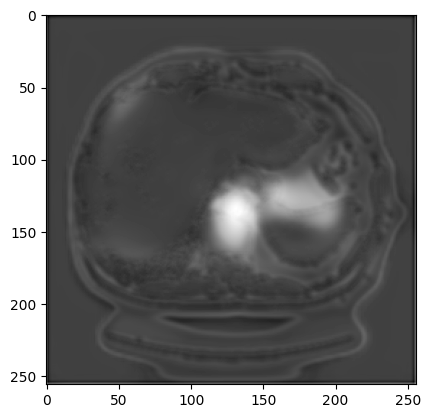

In [ ]:
plt.imshow(pred_u[1].detach().cpu().reshape(256,256), cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

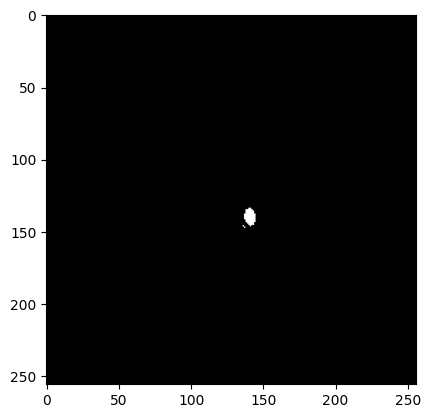

In [ ]:
test_u=pred_u[1].detach().cpu().reshape(256,256).numpy()
ret, bw_img = cv2.threshold(test_u, -0.5, 1, cv2.THRESH_BINARY)
plt.imshow(bw_img, cmap='gray')
plt.show

In [ ]:
import torchvision
torchvision.utils.save_image(pred[1].detach().cpu().reshape(256,256), 'image1.jpg')

In [ ]:
model = UNet().to(device)
model.load_state_dict(u)
#

#SegNet


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.optimizers import Adam, SGD
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
plt.rcParams["axes.grid"] = False
np.random.seed(101)

In [ ]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 101)

In [ ]:
def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac
def dice_coef(y_true, y_pred, smooth = 100):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def accuracy(y_true, y_pred):
    '''Calculates the mean accuracy rate across all predictions for binary
    classification problems.
    '''
    return K.mean(K.equal(y_true, K.round(y_pred)))

In [ ]:
def segnet(epochs_num,savename):

    # Encoding layer
    img_input = Input(shape= (256, 256, 3))
    x = Conv2D(64, (3, 3), padding='same', name='conv1',strides= (1,1))(img_input)
    x = BatchNormalization(name='bn1')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same', name='conv2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(128, (3, 3), padding='same', name='conv3')(x)
    x = BatchNormalization(name='bn3')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', name='conv4')(x)
    x = BatchNormalization(name='bn4')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv5')(x)
    x = BatchNormalization(name='bn5')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv6')(x)
    x = BatchNormalization(name='bn6')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv7')(x)
    x = BatchNormalization(name='bn7')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(512, (3, 3), padding='same', name='conv8')(x)
    x = BatchNormalization(name='bn8')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv9')(x)
    x = BatchNormalization(name='bn9')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv10')(x)
    x = BatchNormalization(name='bn10')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(512, (3, 3), padding='same', name='conv11')(x)
    x = BatchNormalization(name='bn11')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv12')(x)
    x = BatchNormalization(name='bn12')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv13')(x)
    x = BatchNormalization(name='bn13')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Dense(1024, activation = 'relu', name='fc1')(x)
    x = Dense(1024, activation = 'relu', name='fc2')(x)
    # Decoding Layer
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv1')(x)
    x = BatchNormalization(name='bn14')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv2')(x)
    x = BatchNormalization(name='bn15')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv3')(x)
    x = BatchNormalization(name='bn16')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv4')(x)
    x = BatchNormalization(name='bn17')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv5')(x)
    x = BatchNormalization(name='bn18')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv6')(x)
    x = BatchNormalization(name='bn19')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv7')(x)
    x = BatchNormalization(name='bn20')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv8')(x)
    x = BatchNormalization(name='bn21')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv9')(x)
    x = BatchNormalization(name='bn22')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv10')(x)
    x = BatchNormalization(name='bn23')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv11')(x)
    x = BatchNormalization(name='bn24')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv12')(x)
    x = BatchNormalization(name='bn25')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(1, (3, 3), padding='same', name='deconv13')(x)
    x = BatchNormalization(name='bn26')(x)
    x = Activation('sigmoid')(x)
    pred = Reshape((256,256))(x)

    model = Model(inputs=img_input, outputs=pred)

    model.compile(optimizer= SGD(lr=0.001, momentum=0.9,  nesterov=False), loss= ["binary_crossentropy"]
                  , metrics=[iou, dice_coef, precision, recall, accuracy])
    model.summary()
    hist = model.fit(x_train, y_train, epochs= epochs_num, batch_size= 18, validation_data= (x_test, y_test), verbose=1)

    model.save(savename)
    return model,hist

In [ ]:
model, hist = segnet(epochs_num= 5, savename= 'segnet_5_epoch.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 256, 256, 64)      1792      
                                                                 
 bn1 (BatchNormalization)    (None, 256, 256, 64)      256       
                                                                 
 activation (Activation)     (None, 256, 256, 64)      0         
                                                                 
 conv2 (Conv2D)              (None, 256, 256, 64)      36928     
                                                                 
 bn2 (BatchNormalization)    (None, 256, 256, 64)      256       
                                                                 
 activation_1 (Activation)   (None, 256, 256, 64)      0     

In [ ]:
p=[0.0057,
0.0052,
0.0049,
0.0053,
0.0056]

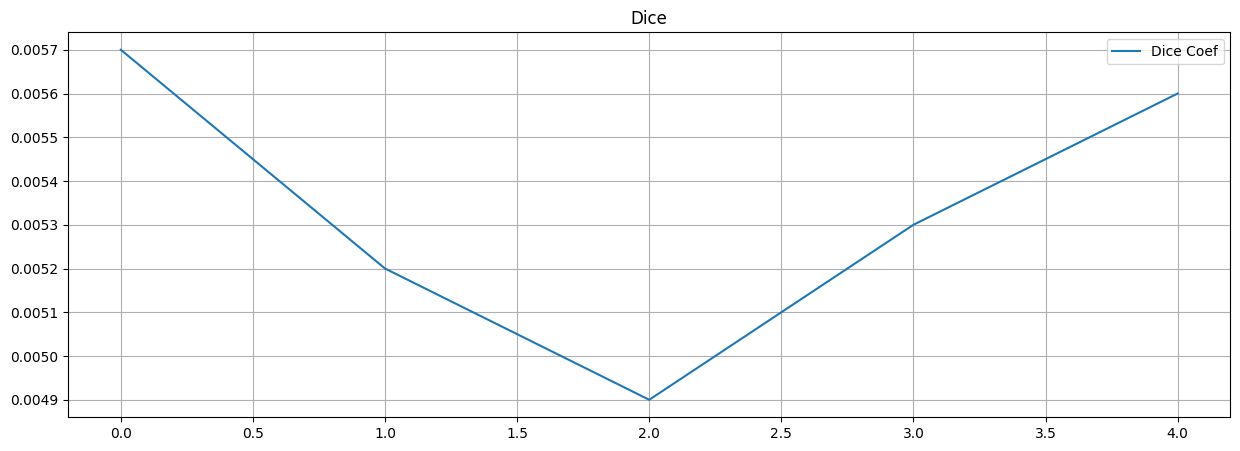

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(p, label='Dice Coef')

plt.title('Dice')

plt.legend()
plt.grid()
plt.show()

In [ ]:
sampe_img = 'sample3.dcm'

In [ ]:
from skimage.io import imread
i1 = imread(sampe_img)

In [ ]:
X[0].shape

(256, 256, 3)

In [ ]:
i1 = X[0]

In [ ]:
i1.shape

(256, 256, 3)

In [ ]:
dcm_sample = dicom.dcmread(sampe_img, force=True)


In [ ]:
dcm_sample_r = resize(dcm_sample.pixel_array, (256,256),mode='constant', anti_aliasing=True)

In [ ]:
i2 = resize(i1, (256,256),mode='constant', anti_aliasing=True)

In [ ]:
i2 = i1

In [ ]:
i2.shape

(256, 256, 3)

In [ ]:
dcm_sample_r.shape

(256, 256)

In [ ]:
dcm_sample_r = np.array(dcm_sample_r, np.float32)

In [ ]:
dcm_sample_r.shape

(256, 256)

In [ ]:
i3 = np.array(i2, np.float32)

In [ ]:
i3.shape

(256, 256, 4)

In [ ]:
# функция дублирования одного слоя на 3
def expand_greyscale_image_channels(grey_pil_image):
    # grey_image_arr = np.array(grey_pil_image)
    grey_image_arr = np.expand_dims(grey_pil_image, -1)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
    return grey_image_arr_3_channel

<function matplotlib.pyplot.show(close=None, block=None)>

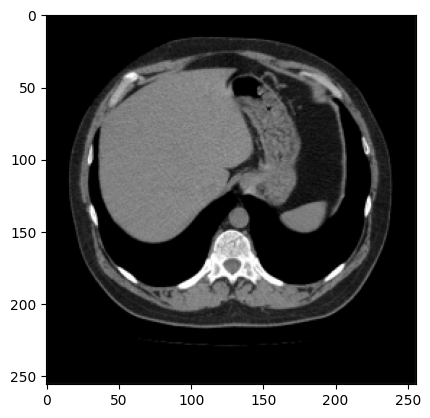

In [ ]:
plt.imshow(i3, cmap='gray')
plt.show

In [ ]:
!pip install dicom2jpg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.0 MB/s eta 0:00:00


In [ ]:
import dicom2jpg
bar = dicom2jpg.dicom2jpg(sampe_img)


In [ ]:
bar

True

In [ ]:
dcm_sample_r = (np.maximum(dcm_sample_r, 0) / dcm_sample_r.max()) * 255.0
dcm_sample_r = np.array(np.uint8(dcm_sample_r), np.float32)

<function matplotlib.pyplot.show(close=None, block=None)>

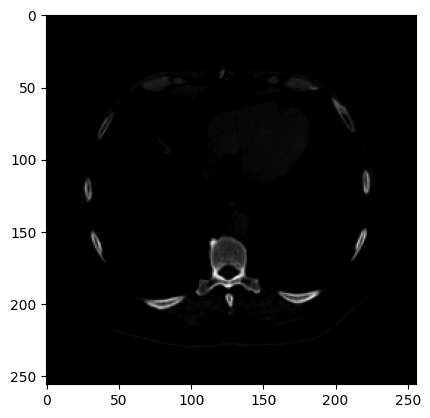

In [ ]:
plt.imshow(dcm_sample_r, cmap='gray')
plt.show

In [ ]:
dcm_sample_r

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
 d_ret, d_bw_img = cv2.threshold(dcm_sample_r, 0.1, 1, cv2.THRESH_BINARY)

In [ ]:
d_bw_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
 d_ret, i4 = cv2.threshold(i3, 0.1, 1, cv2.THRESH_BINARY)

In [ ]:
d_bw_img.shape

(256, 256)

In [ ]:
i4.shape

(256, 256)

In [ ]:
expanded_img = expand_greyscale_image_channels(d_bw_img)

In [ ]:
expanded_img = i4

In [ ]:
i5 = expand_greyscale_image_channels(i4)

<function matplotlib.pyplot.show(close=None, block=None)>

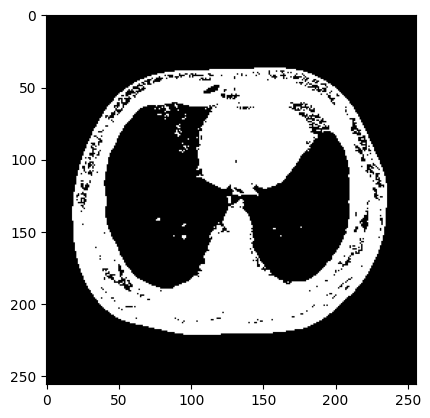

In [ ]:
plt.imshow(X[0], cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

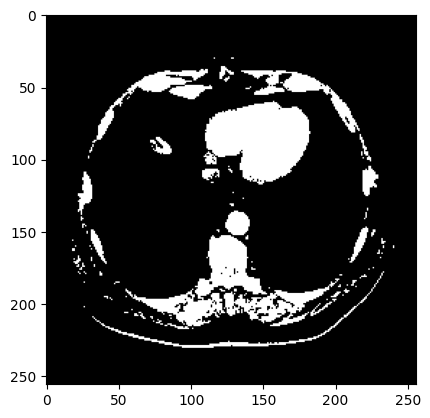

In [ ]:
plt.imshow(expanded_img, cmap='gray')
plt.show

In [ ]:
expanded_img.shape

(256, 256, 3)

In [ ]:
test= []
test.append(expanded_img)

In [ ]:
test= []
test.append(X[0])

In [ ]:
d_bw_img_s = np.array(test, np.float32)

In [ ]:
d_bw_img_s.shape

(1, 256, 256, 3)

In [ ]:
def predict_model_s(model, data):
    Y_pred=0
    predict = 0
    for X_batch , y in data:
        Y_pred = model(X_batch.to(device))

    return Y_pred

In [ ]:
expanded_img.shape

(256, 256, 3)

In [ ]:
i4.shape

(256, 256, 4)

In [ ]:
test= []
test.append(i4)
d_bw_img_s = np.array(test, np.float32)

In [ ]:
Y[1].shape

(256, 256)

In [ ]:
foo = Y[1, np.newaxis]

In [ ]:
foo

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [ ]:
foo.shape

(1, 256, 256)

In [ ]:
f = list(zip(np.rollaxis(d_bw_img_s, 3, 1),Y[1, np.newaxis]))

In [ ]:
data_img = DataLoader(f, batch_size=8, shuffle=True)

In [ ]:
pred_u = predict_model_s(model, data_img)

In [ ]:
pred_u.shape

torch.Size([1, 1, 256, 256])

<function matplotlib.pyplot.show(close=None, block=None)>

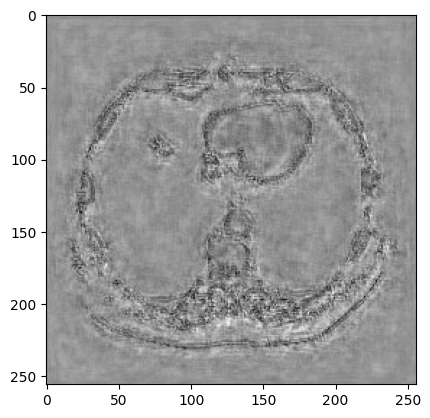

In [ ]:
plt.imshow(pred_u[0].detach().cpu().reshape(256,256), cmap='gray')
plt.show

In [ ]:
predImg = pred_u[0].detach().cpu().reshape(256,256)

In [ ]:
resultImg = np.array(predImg)

In [ ]:
resultImg.shape

(256, 256)

In [ ]:
dcm_sample_r[0][10]

0.0

In [ ]:
resultImg[0,0]

-0.08430794

In [ ]:
resultImg[0]

-0.08430794

In [ ]:
count = 0
sum = 0
for x in range(0, len(resultImg)):
  for y in range(0, len(resultImg[0])):
    if(resultImg[x,y] > 0):
      sum += dcm_sample_r[x,y];
      count += 1
print(sum)
print(count)
normalaizedValue = sum / count

70500.0
49548


In [ ]:
normalaizedValue

1.4228626786146767

In [ ]:
app = []

TypeError: list indices must be integers or slices, not tuple

In [ ]:
for x in range(0, len(dcm_sample_r)):
  for y in range(0, len(dcm_sample_r[0])):
    print(1)
    dcm_sample_r[x,y] /= normalaizedValue

Выходные данные были обрезаны до нескольких последних строк (5000).
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
count = 0
sum = 0
for rowImg in dcm_sample_r:
  for itemImg in rowImg:
    print(1)
    dcm_sample_r[rowImg][itemImg] /= normalaizedValue


1


IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
def getNotmolaizedValue():
  r

In [ ]:
def score_model(model, metric, data):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        Y_pred = torch.sigmoid(model(X_batch.to(device))).round()
        scores += metric(Y_pred, Y_label.to(device)).mean().item()

    return scores/len(data)

In [ ]:
score_model(unet_model, iou_pytorch, data_ts)

0.0

In [ ]:
from skimage.io import imread
imread()

заранее сконвертированное jpg

In [ ]:
sampe_img_convert = 'sample1.jpg'

In [ ]:
from skimage.io import imread
i1 = imread(sampe_img_convert)

In [ ]:
i1[0][0]

array([  0,   0,   0, 255], dtype=uint8)

In [ ]:
i1.shape

(512, 512, 4)

In [ ]:
a_del = np.delete(a, 1, 0)

In [ ]:
#dcm_sample_r = resize(dcm_sample.pixel_array, (256,256),mode='constant', anti_aliasing=True)

#КОНВЕРТЕР

In [ ]:
!pip install pydicom
import pydicom as dicom
from skimage.transform import resize
import numpy as np
import cv2
from PIL import Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.2 MB/s eta 0:00:00


In [ ]:
path='/content/drive/MyDrive/dicom/'
folder=['cancer', 'Pneumonia', 'Tuberculosis']

In [ ]:
import os
directory = os.fsencode(path+folder[2])
for file in os.listdir(directory):
    image_name = os.fsdecode(file)
    dicomImg = dicom.dcmread(path+folder[2]+'/'+image_name, force=True)
    img = dicomImg.pixel_array

    resizedDicom = resize(img, (256,256 ))
    resizedDicom = np.array(resizedDicom, np.float32)
    resizedImg = (np.maximum(resizedDicom, 0) / resizedDicom.max()) * 255.0
    resizedImg = np.array(np.uint8(resizedImg), np.float32)
    d_ret, d_bw_img = cv2.threshold(resizedImg, 0.1, 1, cv2.THRESH_BINARY)
    d_bw_img = expand_greyscale_image_channels(d_bw_img)
    im = Image.fromarray((d_bw_img * 255).astype(np.uint8))
    im.save(path+'jpgScan/'+image_name.split('.dcm')[0]+".jpg")

In [ ]:
# функция дублирования одного слоя на 3
def expand_greyscale_image_channels(grey_pil_image):
    grey_image_arr = np.array(grey_pil_image)
    grey_image_arr = np.expand_dims(grey_image_arr, -1)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
    return grey_image_arr_3_channel

In [ ]:

image_name = 'sample3'
dicomImg = dicom.dcmread(image_name+'.dcm', force=True)
img = dicomImg.pixel_array

resizedDicom = resize(img, (256,256 ))
resizedDicom = np.array(resizedDicom, np.float32)
resizedImg = (np.maximum(resizedDicom, 0) / resizedDicom.max()) * 255.0
resizedImg = np.array(np.uint8(resizedImg), np.float32)
d_ret, d_bw_img = cv2.threshold(resizedImg, 0.1, 1, cv2.THRESH_BINARY)
d_bw_img = expand_greyscale_image_channels(d_bw_img)
im = Image.fromarray((d_bw_img * 255).astype(np.uint8))
im.save(image_name+".jpg")